In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import missingno as msno

In [3]:
df = pd.read_excel('/Users/elenakoncar/Desktop/ICU.xlsx')
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [4]:
## Preprocessing Data ##
# No need to scale or normalize data
# Dataset dimensions below
print("df shape:", df.shape)

df shape: (1925, 231)


In [5]:
# Find total number of patients
print(df['PATIENT_VISIT_IDENTIFIER'].max()+1)

385


In [6]:
# Find how many entries/patient
df.groupby(by = 'PATIENT_VISIT_IDENTIFIER').count()['ICU'].sort_values(ascending = False)

PATIENT_VISIT_IDENTIFIER
0      5
193    5
263    5
262    5
261    5
      ..
126    5
125    5
124    5
123    5
384    5
Name: ICU, Length: 385, dtype: int64

In [7]:
# Check column data types
print(df.dtypes)

PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object


In [8]:
# Check numerical columns summary
print(df.describe())

       PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1925.000000  1925.000000  1925.000000         1920.000000   
mean                 192.000000     0.467532     0.368831            0.108333   
std                  111.168431     0.499074     0.482613            0.310882   
min                    0.000000     0.000000     0.000000            0.000000   
25%                   96.000000     0.000000     0.000000            0.000000   
50%                  192.000000     0.000000     0.000000            0.000000   
75%                  288.000000     1.000000     1.000000            0.000000   
max                  384.000000     1.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1920.000000         1920.000000         1920.000000   
mean             0.028125            0.097917            0.019792   
std              0.165373            0.297279            0.1393

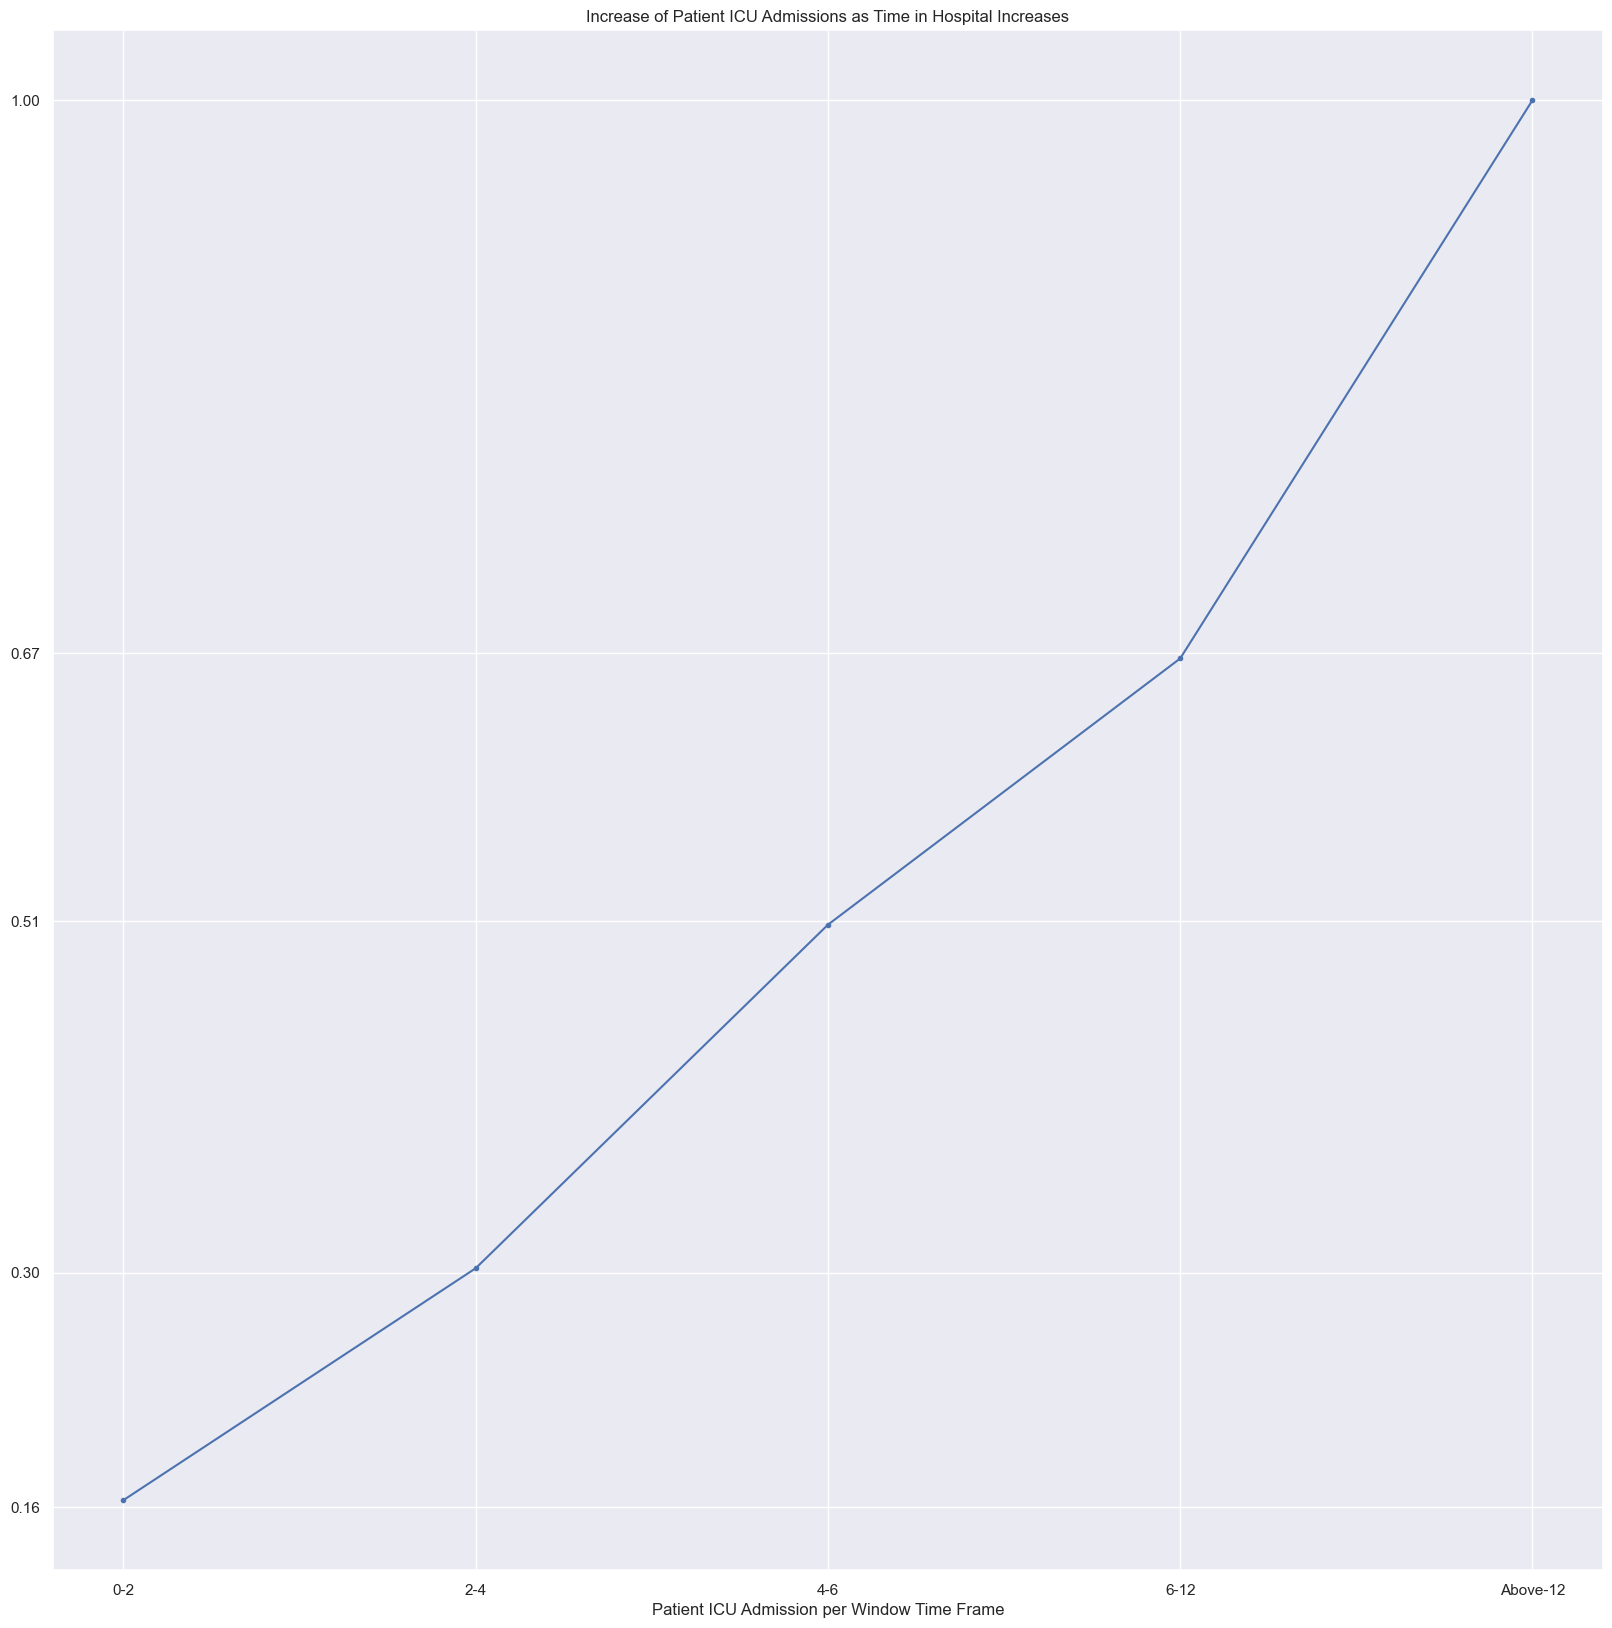

In [78]:
# Illustrate the increase in ICU admissions per time frame
graph = abs(df.groupby("PATIENT_VISIT_IDENTIFIER")["ICU"].sum() - 5)
graph = graph.value_counts().reset_index()
graph.sort_values(by="index", inplace=True)
graph.reset_index(drop=True, inplace=True)

icu_pat = graph.ICU[0:5].sum()
y = graph.ICU[0:5].cumsum() / icu_pat
plt.plot(y, marker=".")

plt.xlabel("Patient ICU Admission per Window Time Frame")
plt.title("Increase of Patient ICU Admissions as Time in Hospital Increases")
plt.yticks(round(y, 2))
plt.xticks([0, 1, 2, 3, 4], ["0-2", "2-4", "4-6", "6-12", "Above-12"])
plt.show()

In [12]:
# Look for missing values
print(df.isnull().sum())

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64


In [13]:
# Calculate mean of missing values
df.isna().mean()

PATIENT_VISIT_IDENTIFIER      0.000000
AGE_ABOVE65                   0.000000
AGE_PERCENTIL                 0.000000
GENDER                        0.000000
DISEASE GROUPING 1            0.002597
                                ...   
RESPIRATORY_RATE_DIFF_REL     0.388571
TEMPERATURE_DIFF_REL          0.360519
OXYGEN_SATURATION_DIFF_REL    0.356364
WINDOW                        0.000000
ICU                           0.000000
Length: 231, dtype: float64

<AxesSubplot:>

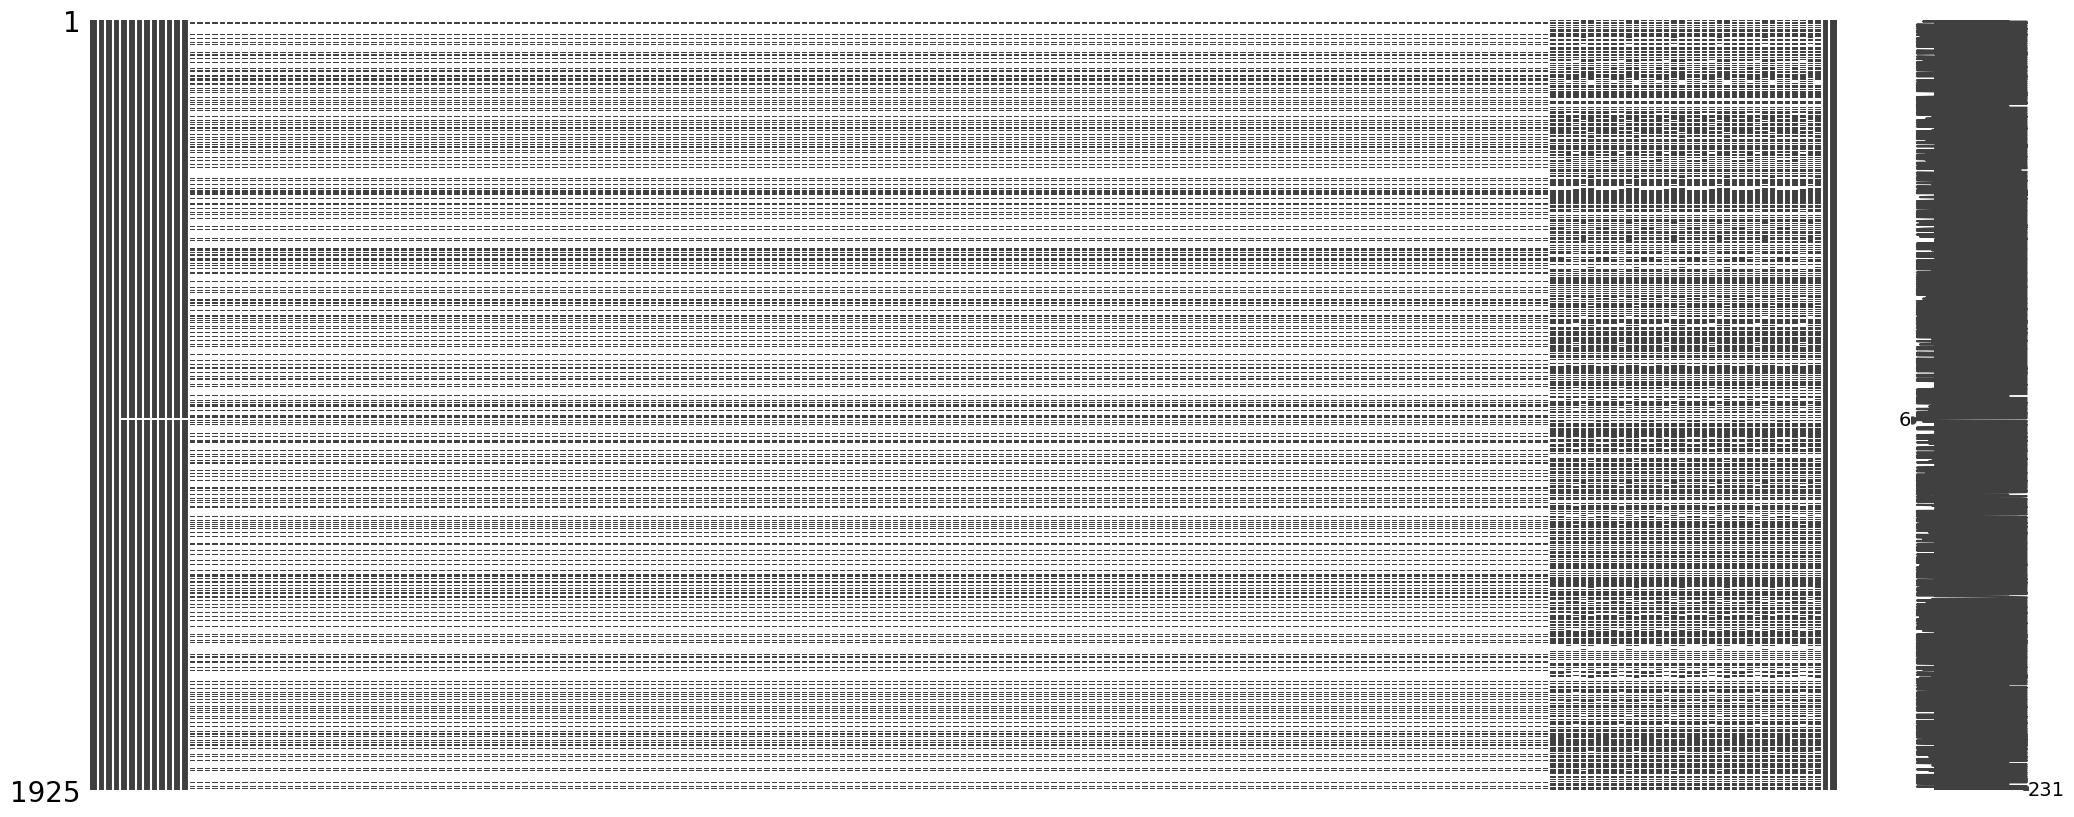

In [14]:
# Matrix visual for missing data
msno.matrix(df)

<AxesSubplot:>

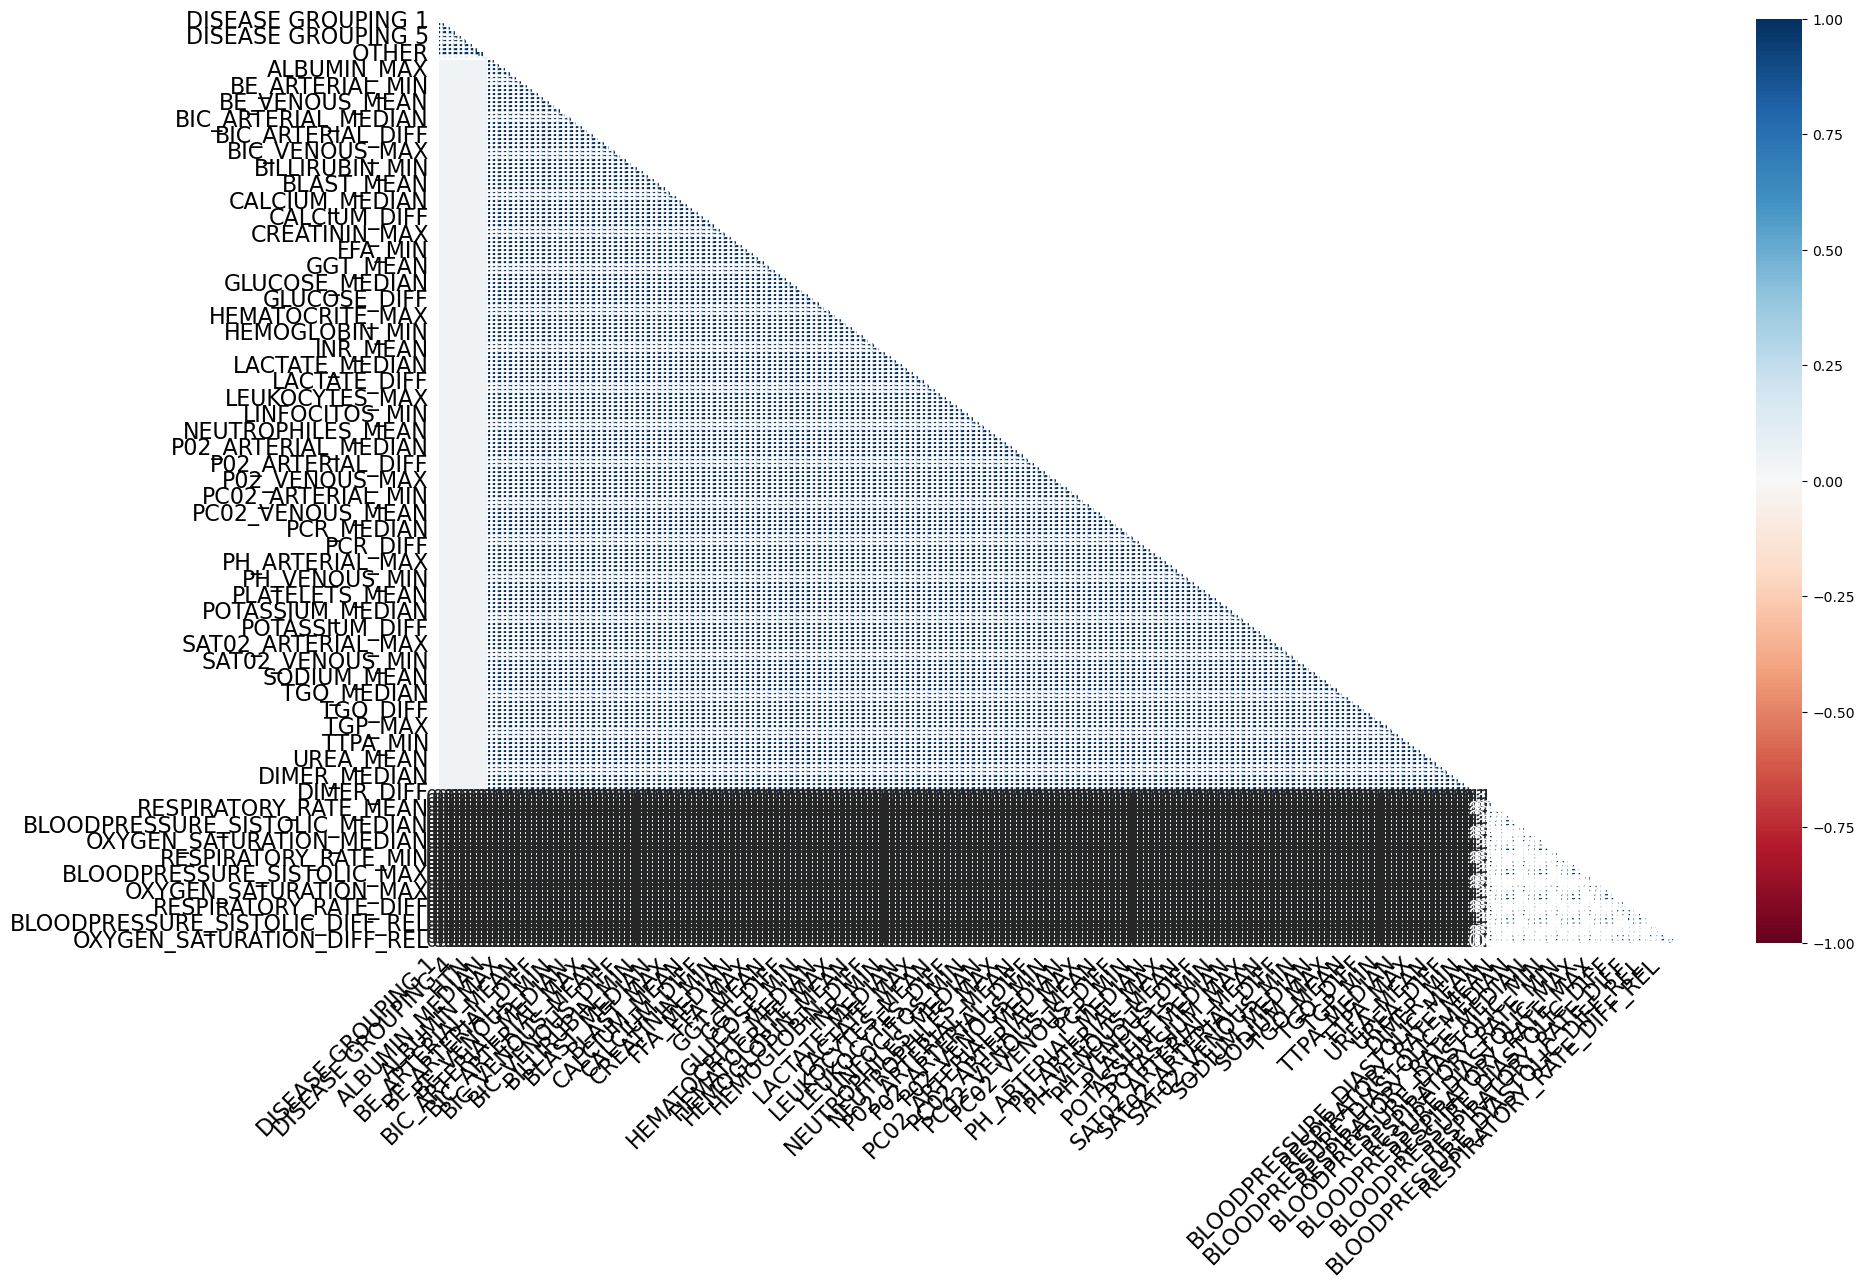

In [15]:
# Visualize missing data as a heatmap
msno.heatmap(df)

<AxesSubplot:>

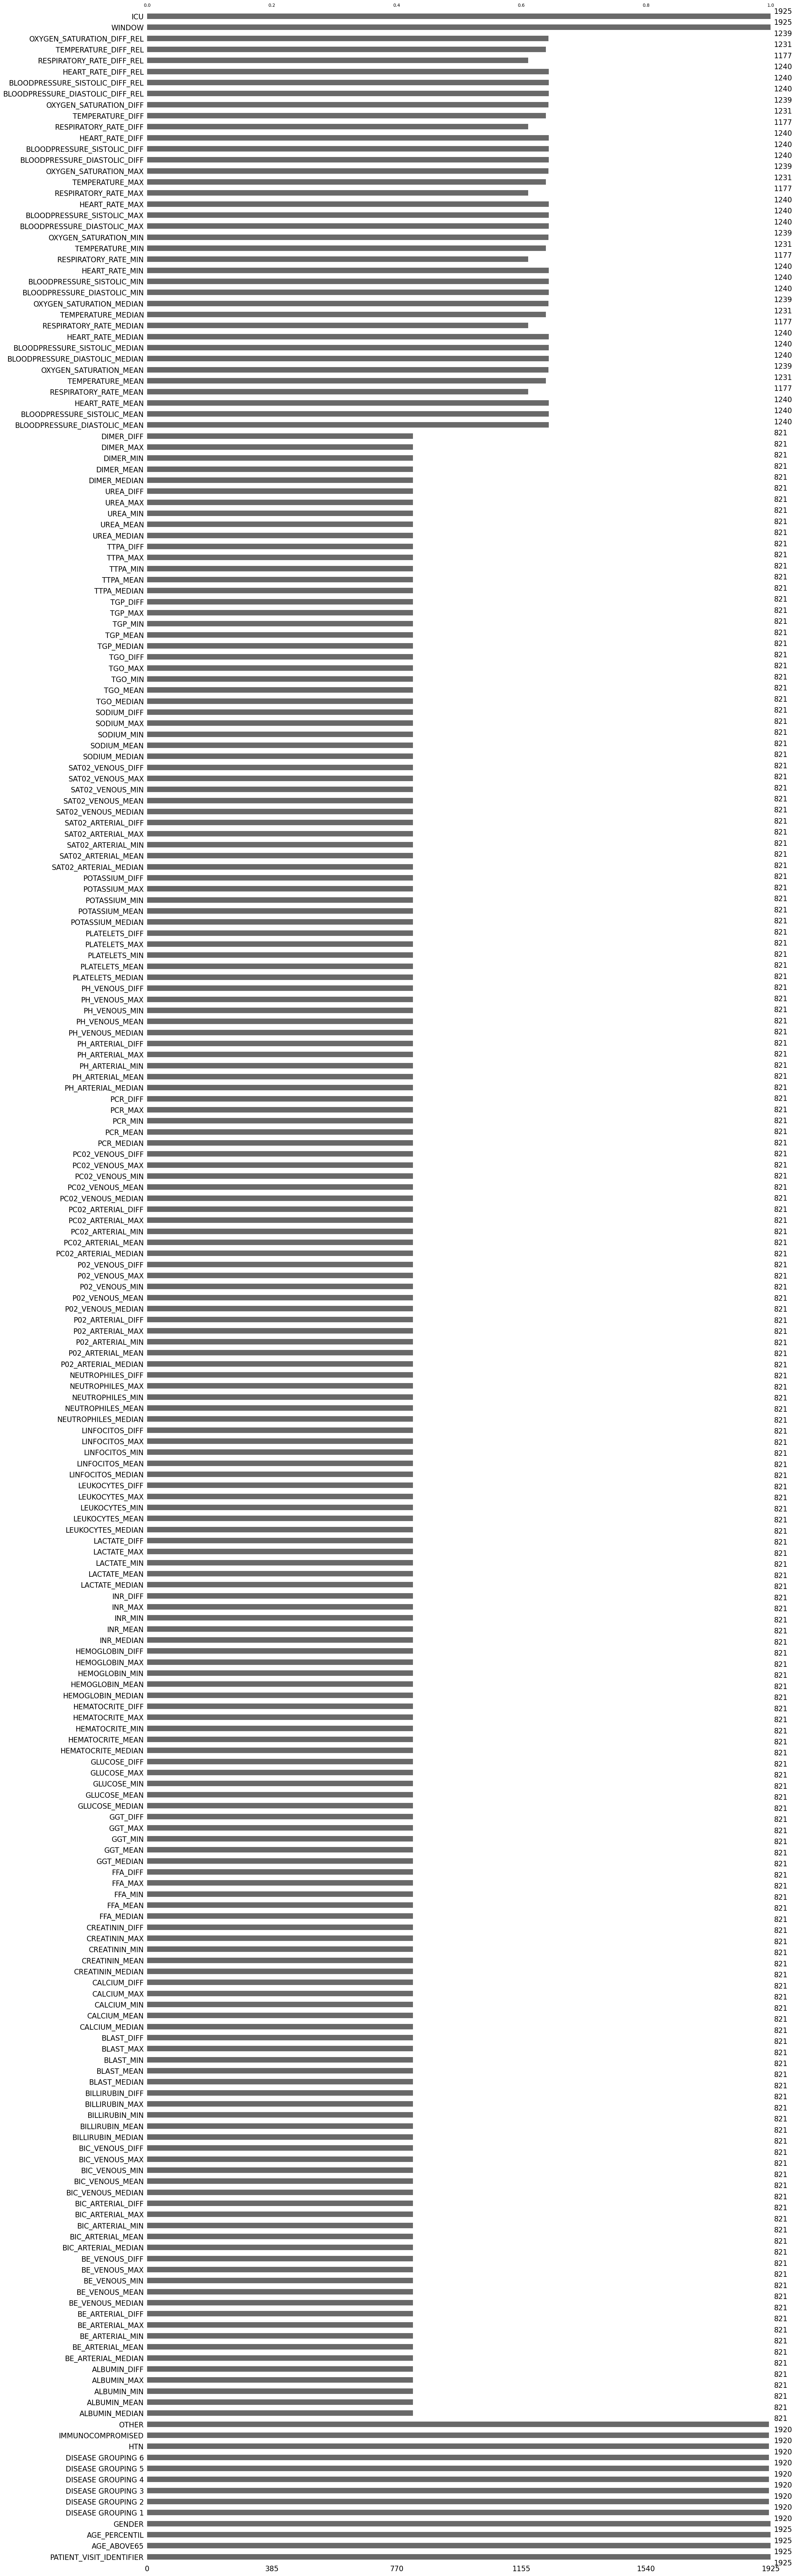

In [16]:
# Visualize missing data as a bar chart
msno.bar(df)

In [17]:
# Adjust for missing values
df_inter = df.interpolate()
print(df_inter.isnull().sum())

PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
AGE_PERCENTIL                 0
GENDER                        0
DISEASE GROUPING 1            0
                             ..
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
WINDOW                        0
ICU                           0
Length: 231, dtype: int64


In [18]:
# Check for duplicate columns based on values
duplicates = []
columns = df_inter.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if df_inter[columns[i]].equals(df_inter[columns[j]]):
            duplicates.append((columns[i], columns[j]))
for column_pair in duplicates:
    print(f"Duplicates found: {column_pair[0]} and {column_pair[1]}")

Duplicates found: ALBUMIN_MEDIAN and ALBUMIN_MEAN
Duplicates found: ALBUMIN_MEDIAN and ALBUMIN_MIN
Duplicates found: ALBUMIN_MEDIAN and ALBUMIN_MAX
Duplicates found: ALBUMIN_MEAN and ALBUMIN_MIN
Duplicates found: ALBUMIN_MEAN and ALBUMIN_MAX
Duplicates found: ALBUMIN_MIN and ALBUMIN_MAX
Duplicates found: ALBUMIN_DIFF and BE_ARTERIAL_DIFF
Duplicates found: ALBUMIN_DIFF and BE_VENOUS_DIFF
Duplicates found: ALBUMIN_DIFF and BIC_ARTERIAL_DIFF
Duplicates found: ALBUMIN_DIFF and BIC_VENOUS_DIFF
Duplicates found: ALBUMIN_DIFF and BILLIRUBIN_DIFF
Duplicates found: ALBUMIN_DIFF and BLAST_DIFF
Duplicates found: ALBUMIN_DIFF and CALCIUM_DIFF
Duplicates found: ALBUMIN_DIFF and CREATININ_DIFF
Duplicates found: ALBUMIN_DIFF and FFA_DIFF
Duplicates found: ALBUMIN_DIFF and GGT_DIFF
Duplicates found: ALBUMIN_DIFF and GLUCOSE_DIFF
Duplicates found: ALBUMIN_DIFF and HEMATOCRITE_DIFF
Duplicates found: ALBUMIN_DIFF and HEMOGLOBIN_DIFF
Duplicates found: ALBUMIN_DIFF and INR_DIFF
Duplicates found: ALBUMIN_DI

In [19]:
# Drop those columns
col_drop = df_inter.drop(columns=[column_pair[1] for column_pair in duplicates])
print("Data shape:", col_drop.shape)

Data shape: (1925, 88)


In [20]:
# Data structure
columns = col_drop.columns
integer_columns = col_drop.select_dtypes(exclude= ["float","object"]).columns
float_columns = col_drop.select_dtypes(exclude= ["integer","object"]).columns
string_columns = col_drop.select_dtypes(exclude=["integer","float"]).columns

In [21]:
# our ML algorithm will not be able to understand non-numeric values
# transform categorical to numeric
le = LabelEncoder()
categorical = ['AGE_PERCENTIL', 'WINDOW']
for column in categorical:
    col_drop[column] = le.fit_transform(col_drop[column])
print(col_drop)

      PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  \
0                            0            1              5       0   
1                            0            1              5       0   
2                            0            1              5       0   
3                            0            1              5       0   
4                            0            1              5       0   
...                        ...          ...            ...     ...   
1920                       384            0              4       1   
1921                       384            0              4       1   
1922                       384            0              4       1   
1923                       384            0              4       1   
1924                       384            0              4       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.

In [38]:
# Remove all patients in the window 0-2 who have ICU = 1
use = col_drop.loc[(df['WINDOW'] != '0-2') | (col_drop['ICU'] != 1)]
print(use)

      PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  \
0                            0            1              5       0   
1                            0            1              5       0   
2                            0            1              5       0   
3                            0            1              5       0   
4                            0            1              5       0   
...                        ...          ...            ...     ...   
1920                       384            0              4       1   
1921                       384            0              4       1   
1922                       384            0              4       1   
1923                       384            0              4       1   
1924                       384            0              4       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.

<AxesSubplot:xlabel='ICU', ylabel='count'>

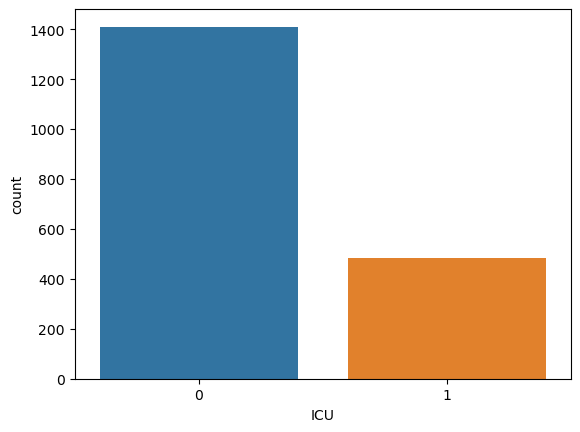

In [41]:
# Distribution of "ICU," the target variable
# Imbalanced
sns.countplot(x="ICU", data=use)

<AxesSubplot:>

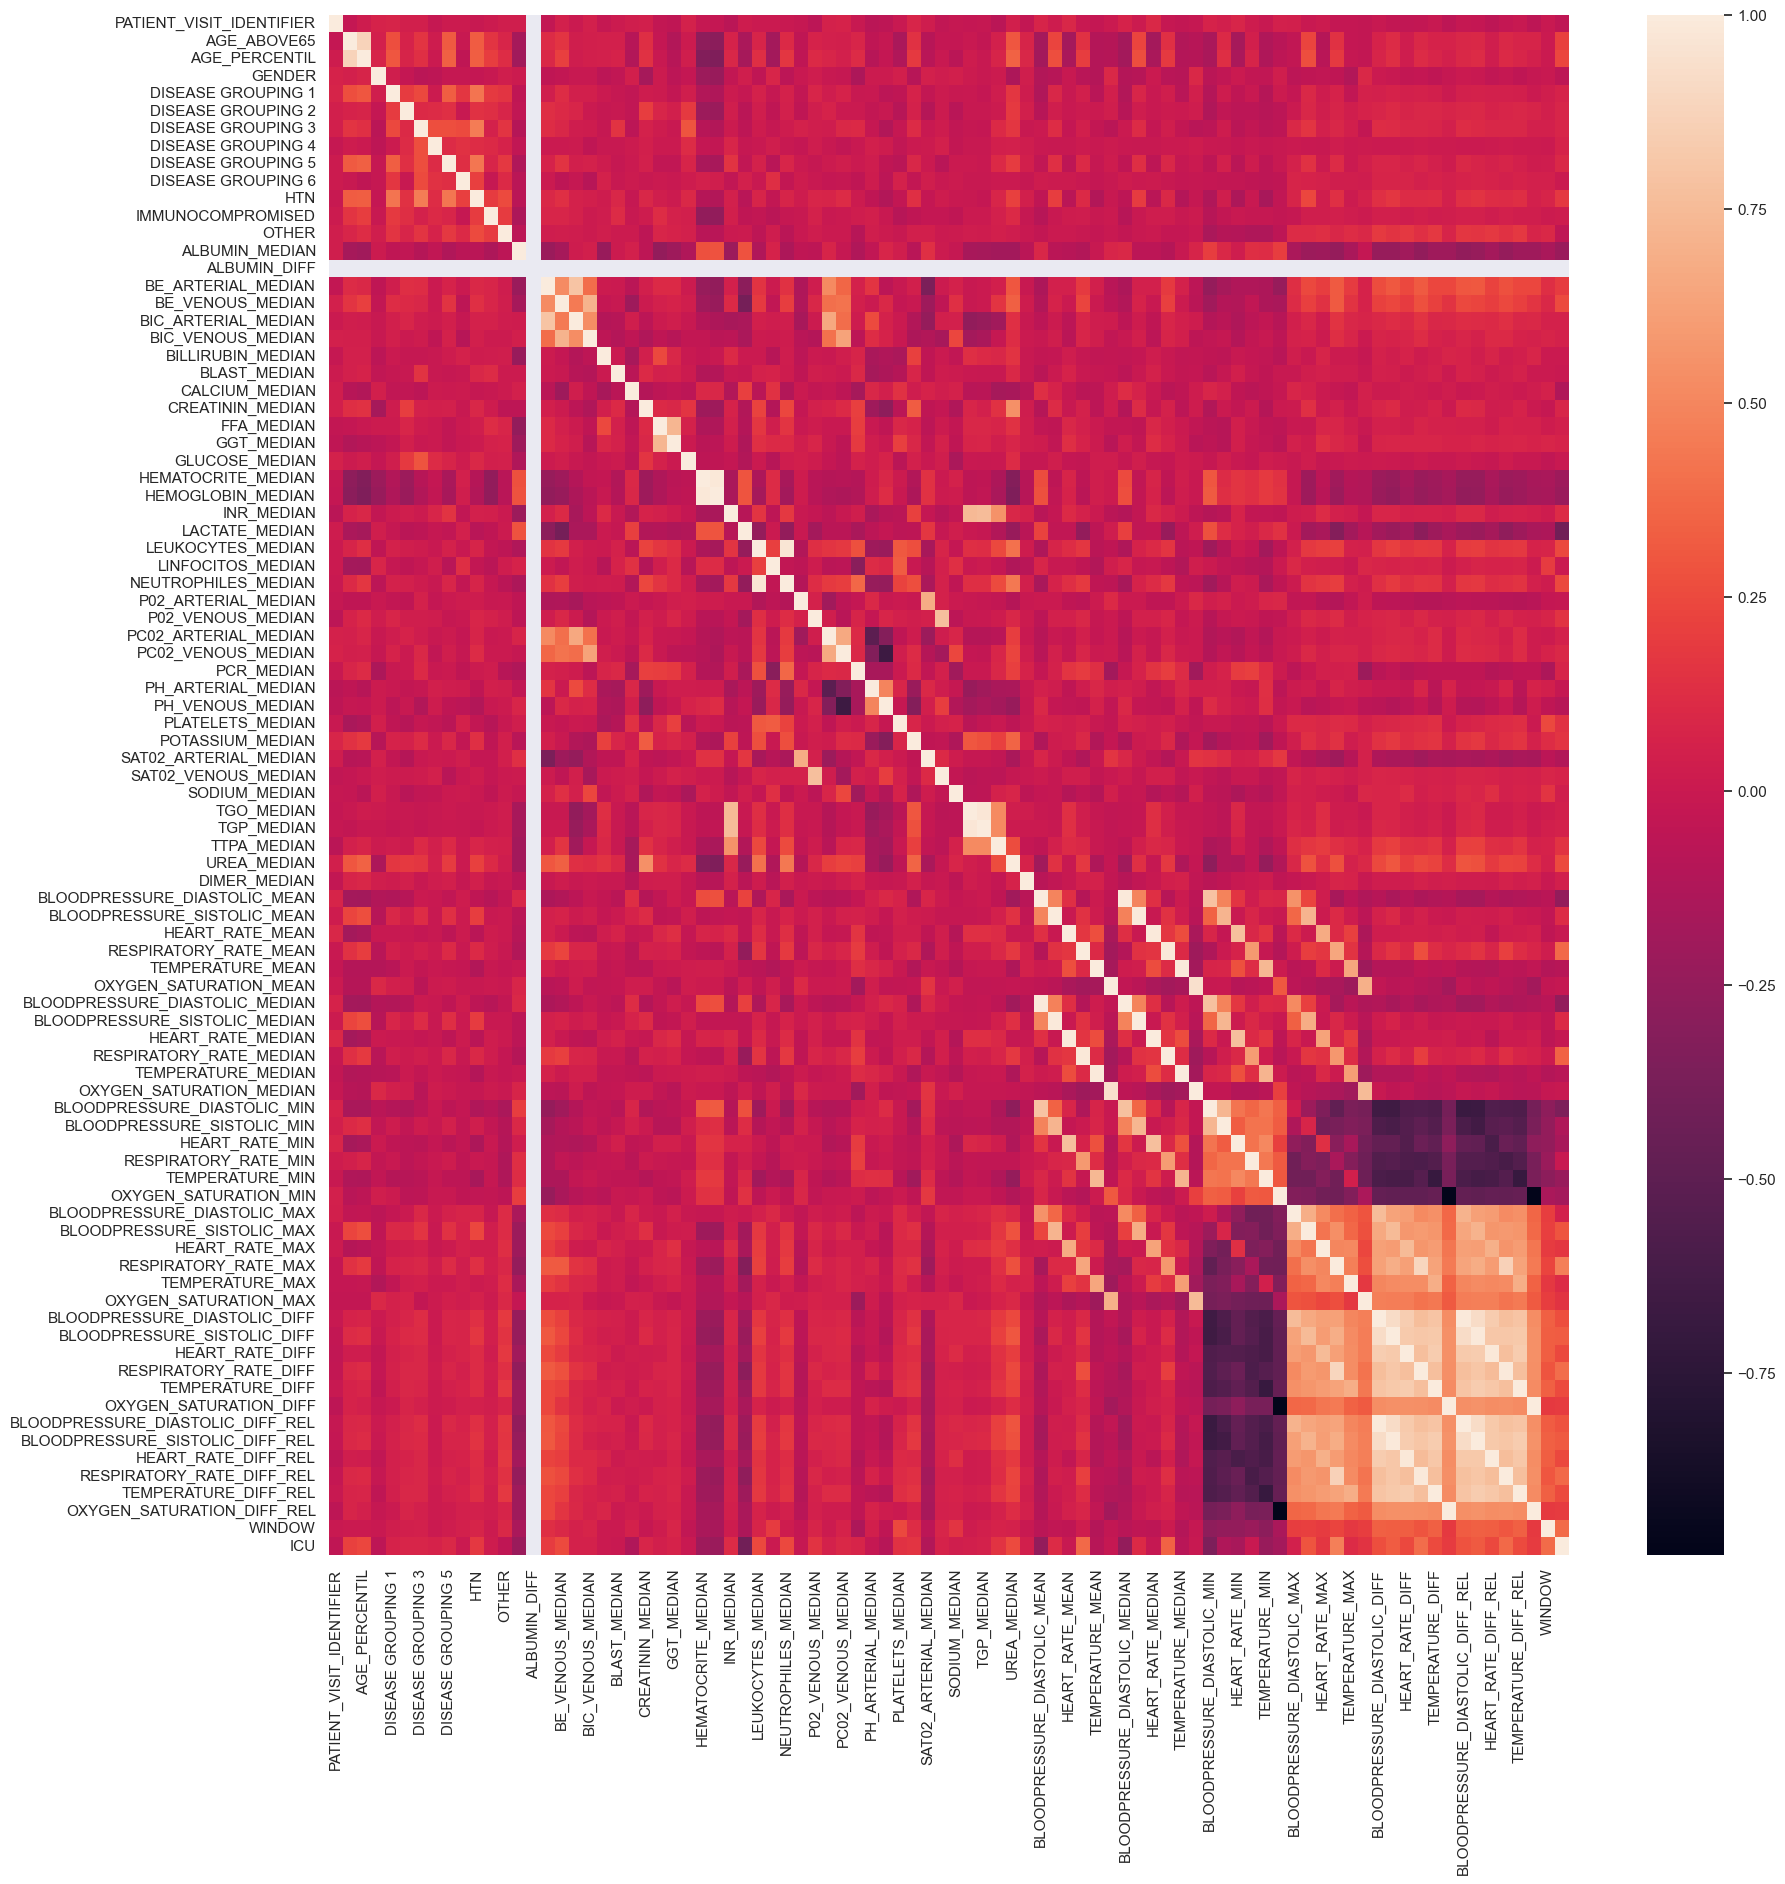

In [42]:
# Correlation matrix between numerical values
corr = use.corr()
sns.set(rc={"figure.figsize": (20, 20)})
sns.heatmap(corr)

In [43]:
# Organize the correlation matrix in stacked format
corr_table = corr.unstack().reset_index()
corr_table.columns = ['Variable 1','Variable 2','Correlation']
print(corr_table)

                    Variable 1                  Variable 2  Correlation
0     PATIENT_VISIT_IDENTIFIER    PATIENT_VISIT_IDENTIFIER     1.000000
1     PATIENT_VISIT_IDENTIFIER                 AGE_ABOVE65    -0.028299
2     PATIENT_VISIT_IDENTIFIER               AGE_PERCENTIL     0.022535
3     PATIENT_VISIT_IDENTIFIER                      GENDER     0.062032
4     PATIENT_VISIT_IDENTIFIER          DISEASE GROUPING 1     0.073498
...                        ...                         ...          ...
7739                       ICU   RESPIRATORY_RATE_DIFF_REL     0.377279
7740                       ICU        TEMPERATURE_DIFF_REL     0.251188
7741                       ICU  OXYGEN_SATURATION_DIFF_REL     0.192952
7742                       ICU                      WINDOW     0.384387
7743                       ICU                         ICU     1.000000

[7744 rows x 3 columns]


In [44]:
# Find the strongest correlations
strongest_corr = corr_table.sort_values(by='Correlation', ascending=False)
top_n = 20
top_corr = strongest_corr.head(top_n)
correlation = use.corr()['ICU']
print(correlation)

PATIENT_VISIT_IDENTIFIER     -0.046754
AGE_ABOVE65                   0.211869
AGE_PERCENTIL                 0.239553
GENDER                       -0.060498
DISEASE GROUPING 1            0.067857
                                ...   
RESPIRATORY_RATE_DIFF_REL     0.377279
TEMPERATURE_DIFF_REL          0.251188
OXYGEN_SATURATION_DIFF_REL    0.192952
WINDOW                        0.384387
ICU                           1.000000
Name: ICU, Length: 88, dtype: float64


In [45]:
# Pick most correlated variables
threshold = 0.2
highly_correlated = correlation[abs(correlation) > threshold].index
machine_learning_df = use[highly_correlated]
machine_learning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1924
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AGE_ABOVE65                       1893 non-null   int64  
 1   AGE_PERCENTIL                     1893 non-null   int64  
 2   ALBUMIN_MEDIAN                    1891 non-null   float64
 3   BE_VENOUS_MEDIAN                  1891 non-null   float64
 4   HEMATOCRITE_MEDIAN                1891 non-null   float64
 5   HEMOGLOBIN_MEDIAN                 1891 non-null   float64
 6   LACTATE_MEDIAN                    1891 non-null   float64
 7   LEUKOCYTES_MEDIAN                 1891 non-null   float64
 8   NEUTROPHILES_MEDIAN               1891 non-null   float64
 9   UREA_MEDIAN                       1891 non-null   float64
 10  BLOODPRESSURE_DIASTOLIC_MEAN      1893 non-null   float64
 11  RESPIRATORY_RATE_MEAN             1893 non-null   float64
 12  BLOODP

In [46]:
# Make sure AGE_PERCENTIL is not string
encoder = LabelEncoder()
machine_learning_df['AGE_PERCENTIL'] = encoder.fit_transform(machine_learning_df['AGE_PERCENTIL'])

/var/folders/sj/yc_q_hbs2m9__l141skb8xk40000gn/T/ipykernel_98622/137728104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machine_learning_df['AGE_PERCENTIL'] = encoder.fit_transform(machine_learning_df['AGE_PERCENTIL'])


In [47]:
# Drop any additional missing values
ml = machine_learning_df.dropna()

In [88]:
# Modeling
# Import packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn import metrics
import math
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

(1891, 29)
(1891, 1)
(1266, 29)
(625, 29)
Accuracy: 0.856
F1 Score: 0.6875000000000001


/Users/elenakoncar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elenakoncar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


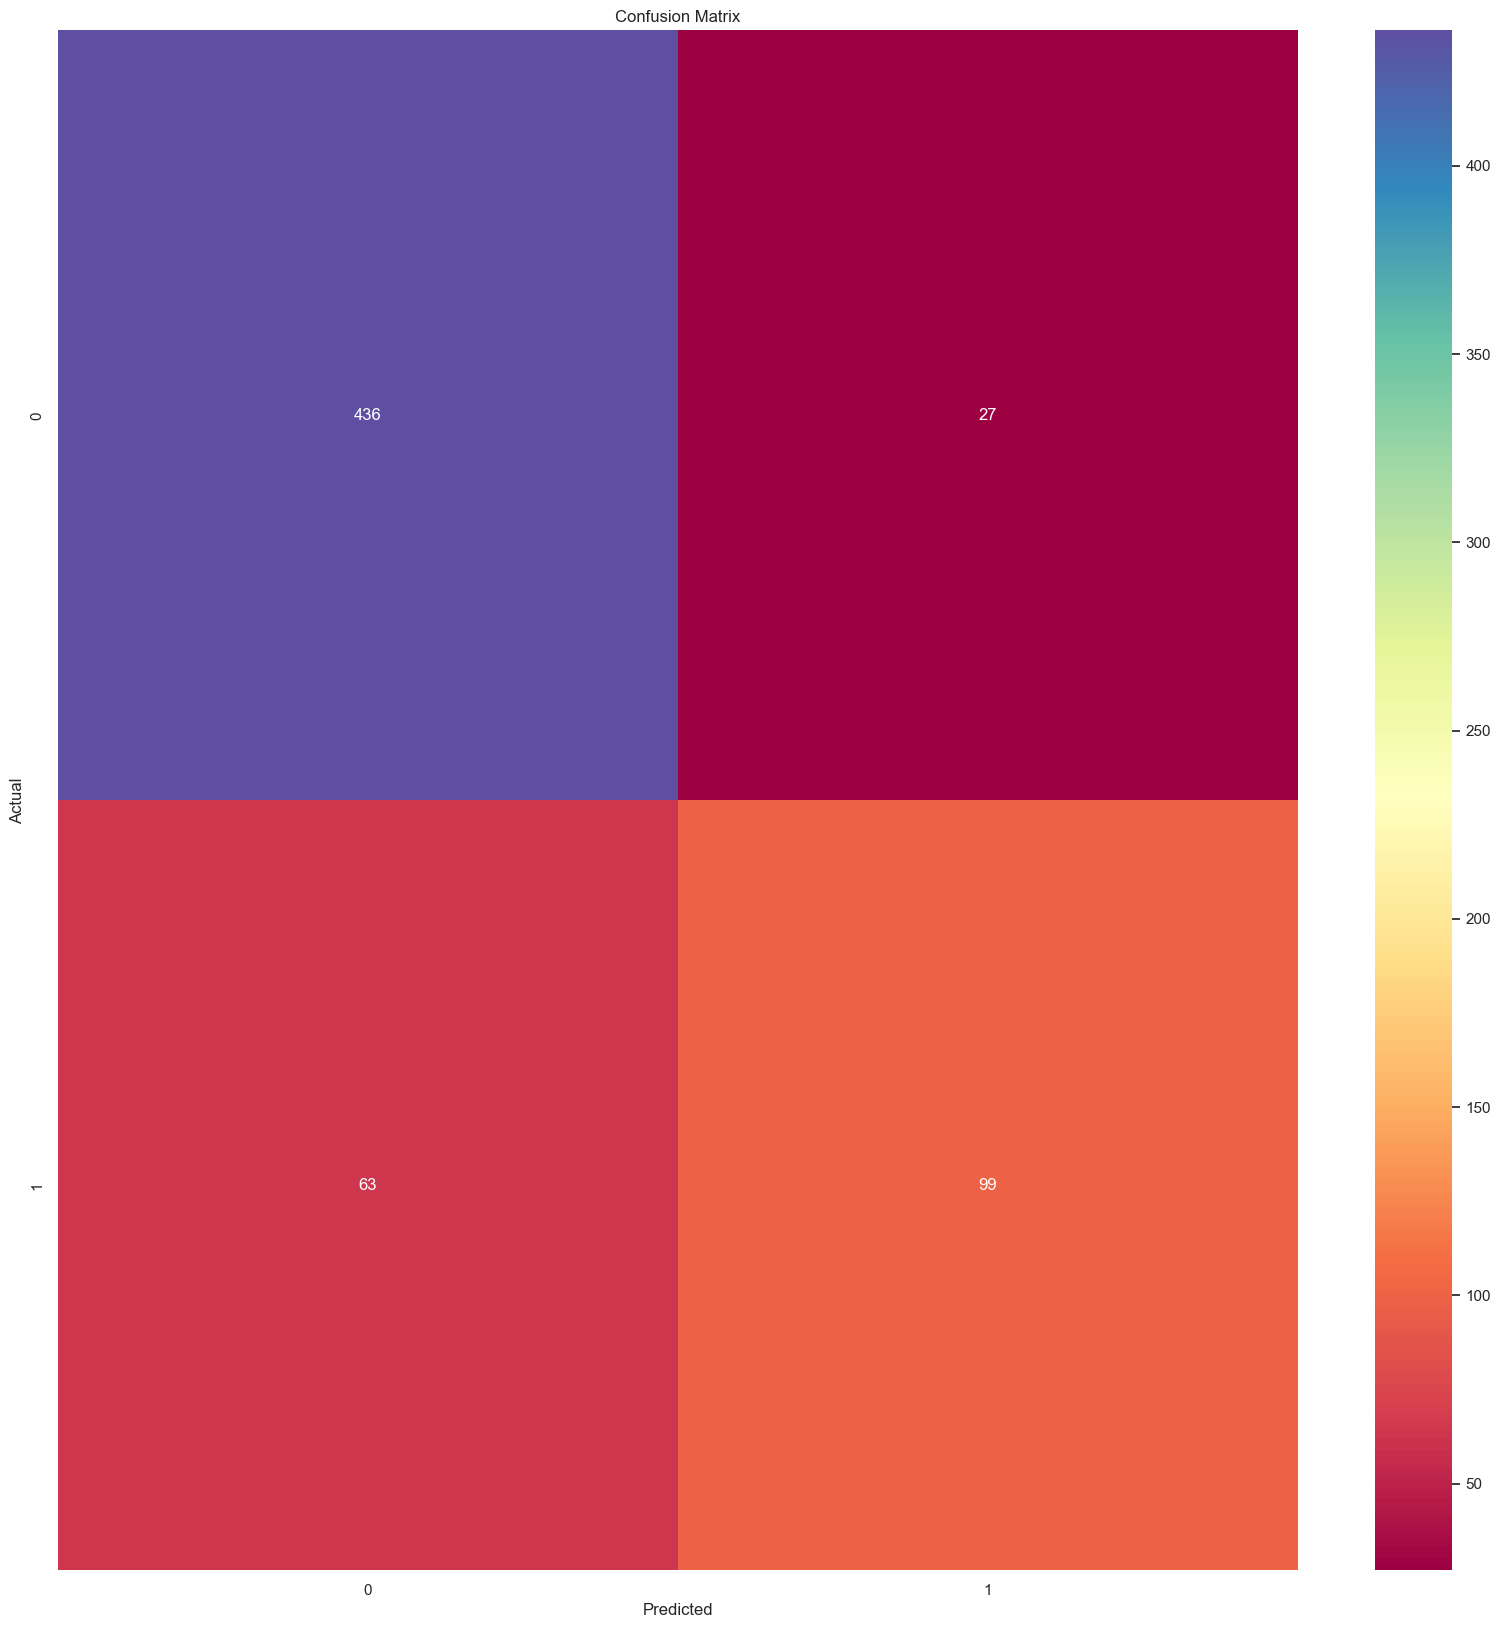

Confidence Interval: [0.9183, 0.9587]


In [90]:
# Logistic Regression # 1

# Define independent and dependent variables
X = ml.drop(['ICU'], axis = 1)
y = ml[['ICU']]
print(X.shape)
print(y.shape)

#Define training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

# Create Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on testing set
y_pred_lr = model.predict(X_test)

# Accuracy of Logistic Regression
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# F1 score of Logistic Regression
f1 = f1_score(y_test, y_pred_lr)
print("F1 Score:", f1)

# Confusion Matrix of Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, cmap='Spectral',annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Calculate Confidence Interval of f1 score

 # Calculate observed proportion
def calculate_f1_confidence_interval(true_positives, false_positives, false_negatives, confidence_level=0.95):
    p = true_positives / (true_positives + false_positives)
    
# Calculate z-score for 95% confidence level
    z = 1.96
    
# Calculate sample size
    n = true_positives + false_positives + false_negatives
    
# Calculate lower bound
    lb = (p + (z**2) / (2 * n) - z * math.sqrt((p * (1 - p)) / n + (z**2) / (4 * n**2))) / (1 + (z**2) / n)

# Calculate upper bound
    ub = (p + (z**2) / (2 * n) + z * math.sqrt((p * (1 - p)) / n + (z**2) / (4 * n**2))) / (1 + (z**2) / n)
    
    return lb, ub

# Data from confusion matrix above
true_positives = 436
false_positives = 27
false_negatives = 63

lb, ub = calculate_f1_confidence_interval(true_positives, false_positives, false_negatives)

print(f"Confidence Interval: [{lb:.4f}, {ub:.4f}]")

/var/folders/sj/yc_q_hbs2m9__l141skb8xk40000gn/T/ipykernel_98622/1082264086.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Accuracy: 0.8832
F1 Score: 0.7383512544802868


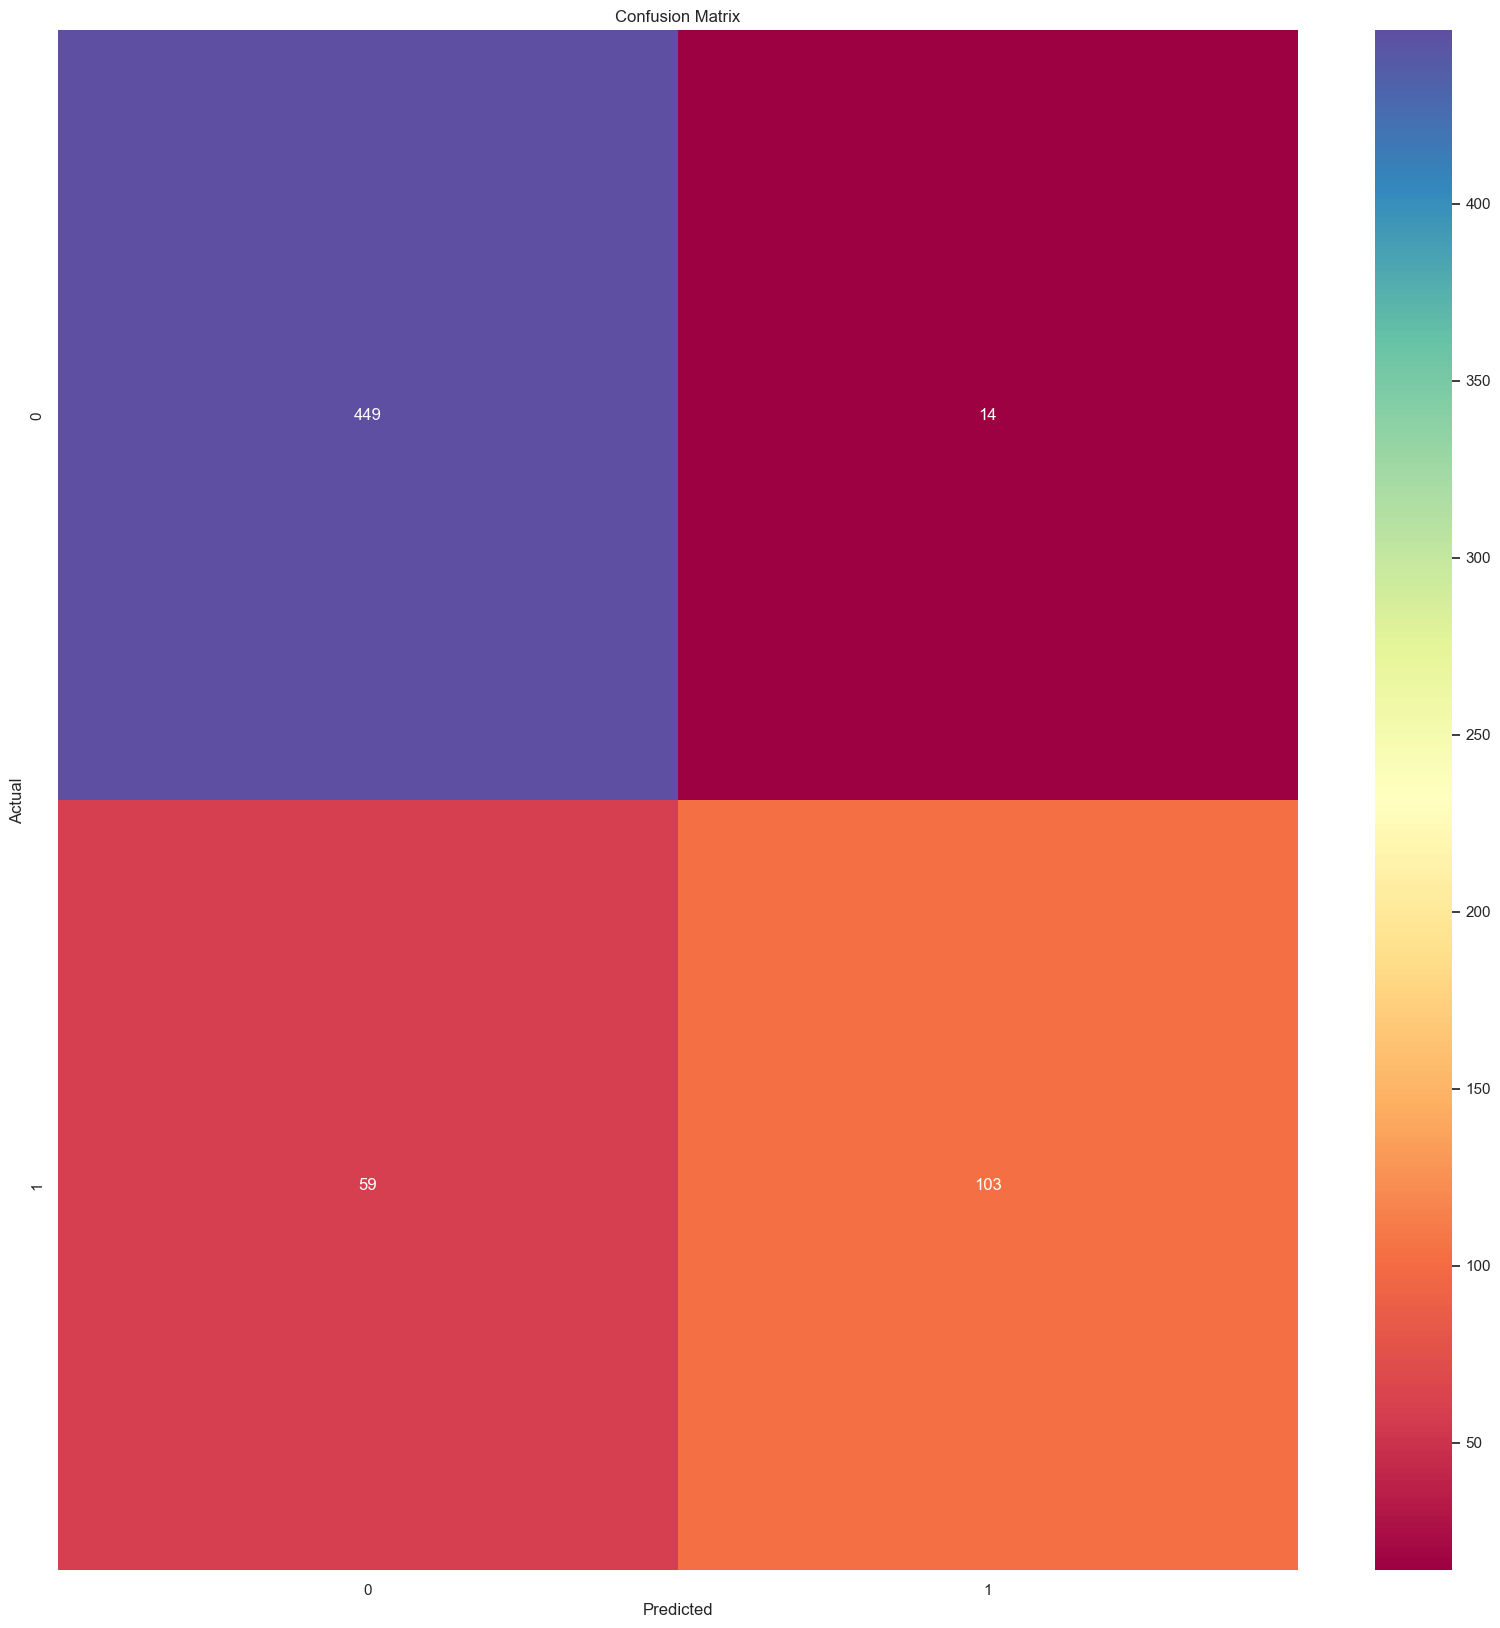

Confidence Interval: [0.9513, 0.9814]


In [91]:
# Random Forest Classifier # 1
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to training set
rfc.fit(X_train, y_train)

# Predict on test data
y_pred_rfc = rfc.predict(X_test)

# Accuracy of Random Forest Classifier
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy)

# F1 score of Random Forest Classifier
f1 = f1_score(y_test, y_pred_rfc)
print("F1 Score:", f1)

# Confusion Matrix of Random Forest Classifier
cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, cmap='Spectral',annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Calculate Confidence Interval of f1 score
 # Calculate observed proportion
def calculate_f1_confidence_interval(true_positives, false_positives, false_negatives, confidence_level=0.95):
    p = true_positives / (true_positives + false_positives)
    
# Calculate z-score for 95% confidence level
    z = 1.96
    
# Calculate sample size
    n = true_positives + false_positives + false_negatives
    
# Calculate lower bound
    lb = (p + (z**2) / (2 * n) - z * math.sqrt((p * (1 - p)) / n + (z**2) / (4 * n**2))) / (1 + (z**2) / n)

# Calculate upper bound
    ub = (p + (z**2) / (2 * n) + z * math.sqrt((p * (1 - p)) / n + (z**2) / (4 * n**2))) / (1 + (z**2) / n)
    
    return lb, ub

# Data from confusion matrix above
true_positives = 449
false_positives = 14
false_negatives = 59

lb, ub = calculate_f1_confidence_interval(true_positives, false_positives, false_negatives)

print(f"Confidence Interval: [{lb:.4f}, {ub:.4f}]")

Accuracy: 0.832
F1 Score: 0.6788990825688074


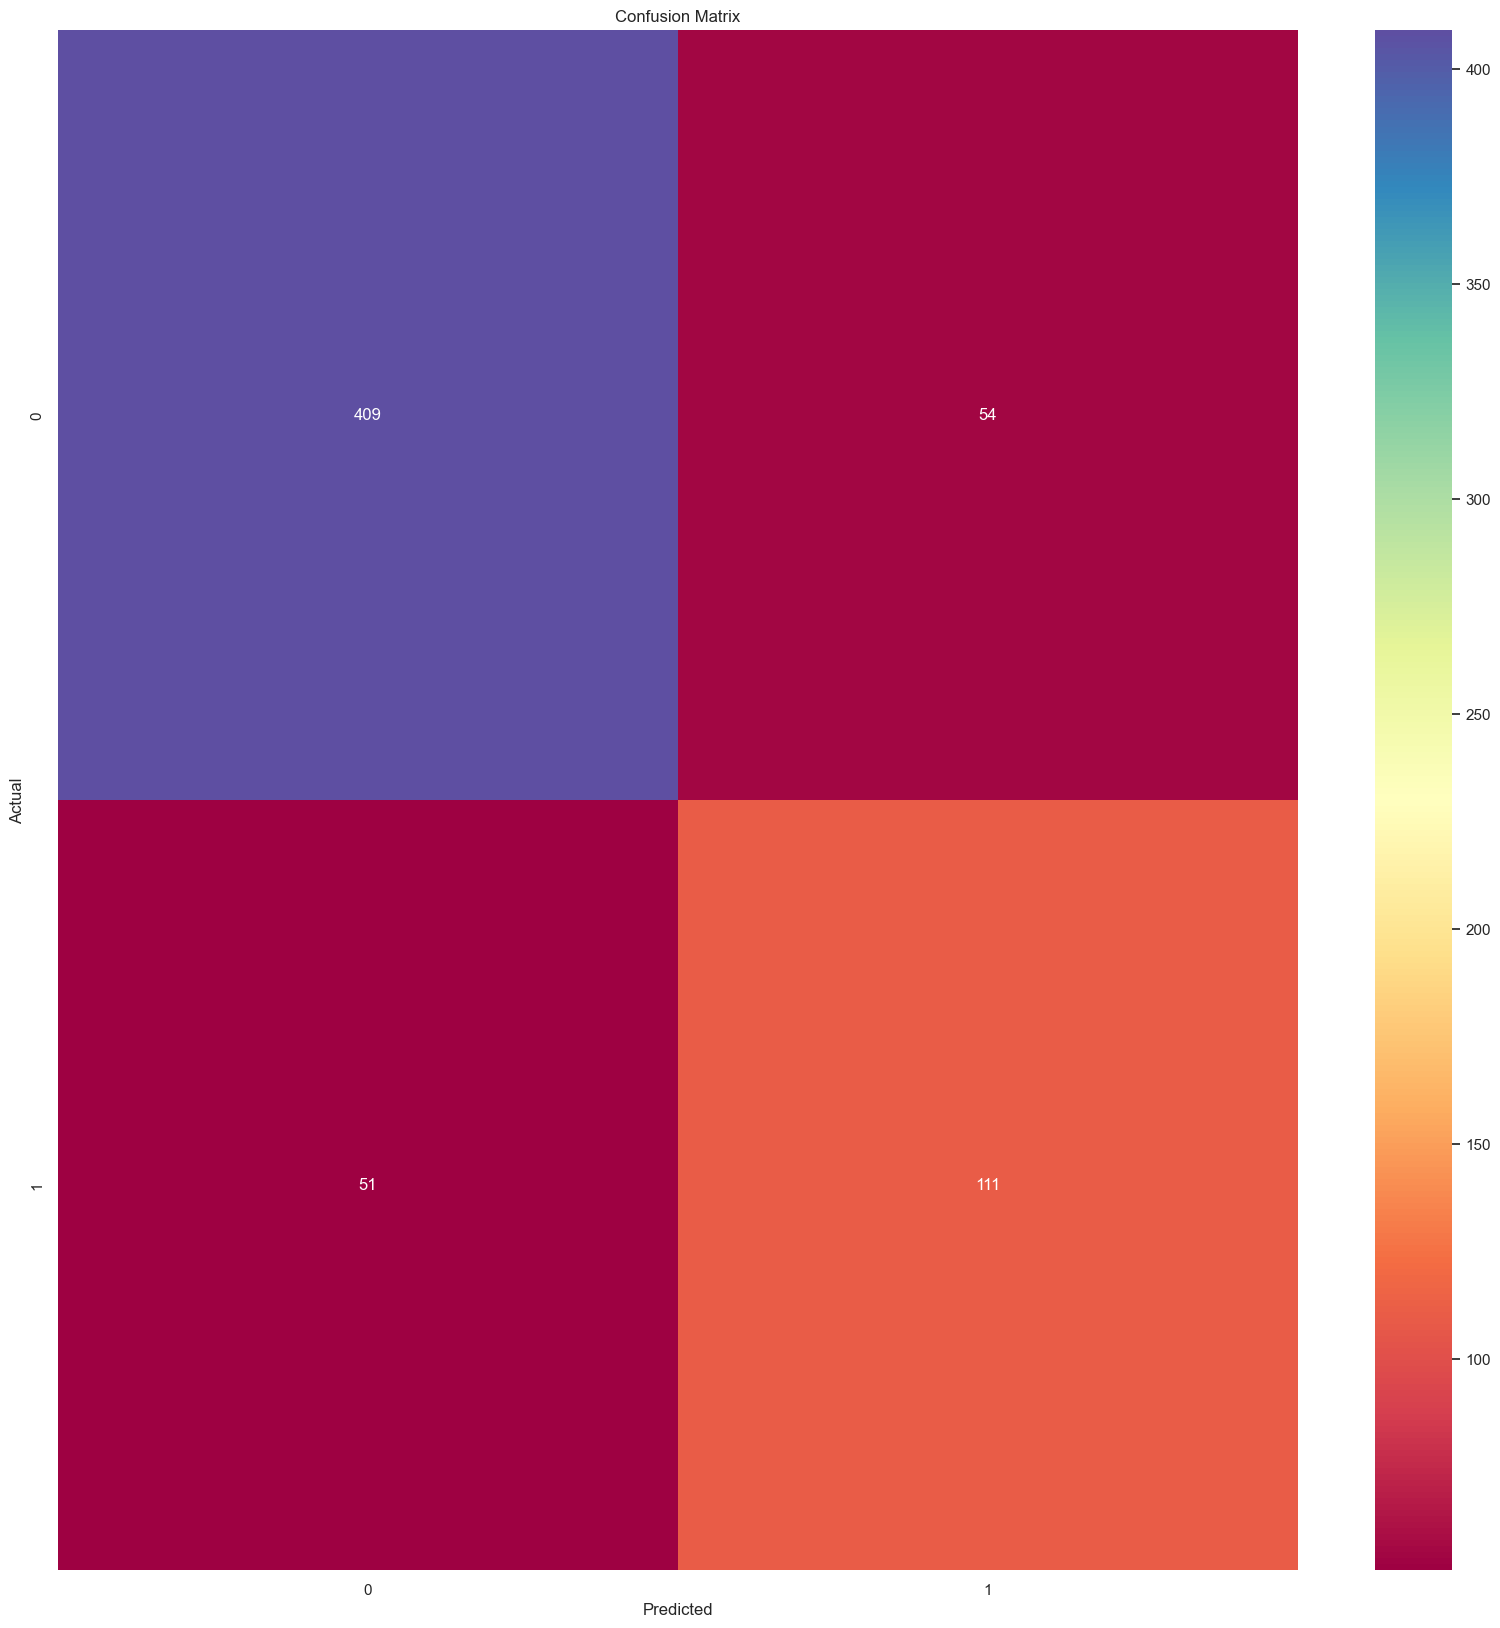

Confidence Interval: [0.8646, 0.9179]


In [92]:
# Decision Tree Classifier #1
dtc = DecisionTreeClassifier()

# Train the classifier
dtc.fit(X_train, y_train)

# Predict on test set
y_pred_dtc = dtc.predict(X_test)

# Accuracy of Decision Tree Classifier
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy)

# F1 score of Decision Tree Classifier
f1 = f1_score(y_test, y_pred_dtc)
print("F1 Score:", f1)

# Confusion Matrix of Decision Tree Classifier
cm = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm, cmap='Spectral',annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Calculate confidence interval of f1 score

 # Calculate observed proportion
def calculate_f1_confidence_interval(true_positives, false_positives, false_negatives, confidence_level=0.95):
    p = true_positives / (true_positives + false_positives)
    
# Calculate z-score for 95% confidence level
    z = 1.96
    
# Calculate sample size
    n = true_positives + false_positives + false_negatives
    
# Calculate lower bound
    lb = (p + (z**2) / (2 * n) - z * math.sqrt((p * (1 - p)) / n + (z**2) / (4 * n**2))) / (1 + (z**2) / n)

# Calculate upper bound
    ub = (p + (z**2) / (2 * n) + z * math.sqrt((p * (1 - p)) / n + (z**2) / (4 * n**2))) / (1 + (z**2) / n)
    
    return lb, ub

# Data from confusion matrix above
true_positives = 414
false_positives = 49
false_negatives = 51

lb, ub = calculate_f1_confidence_interval(true_positives, false_positives, false_negatives)

print(f"Confidence Interval: [{lb:.4f}, {ub:.4f}]")

/Users/elenakoncar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8707124010554089
F1 Score: 0.6838709677419356


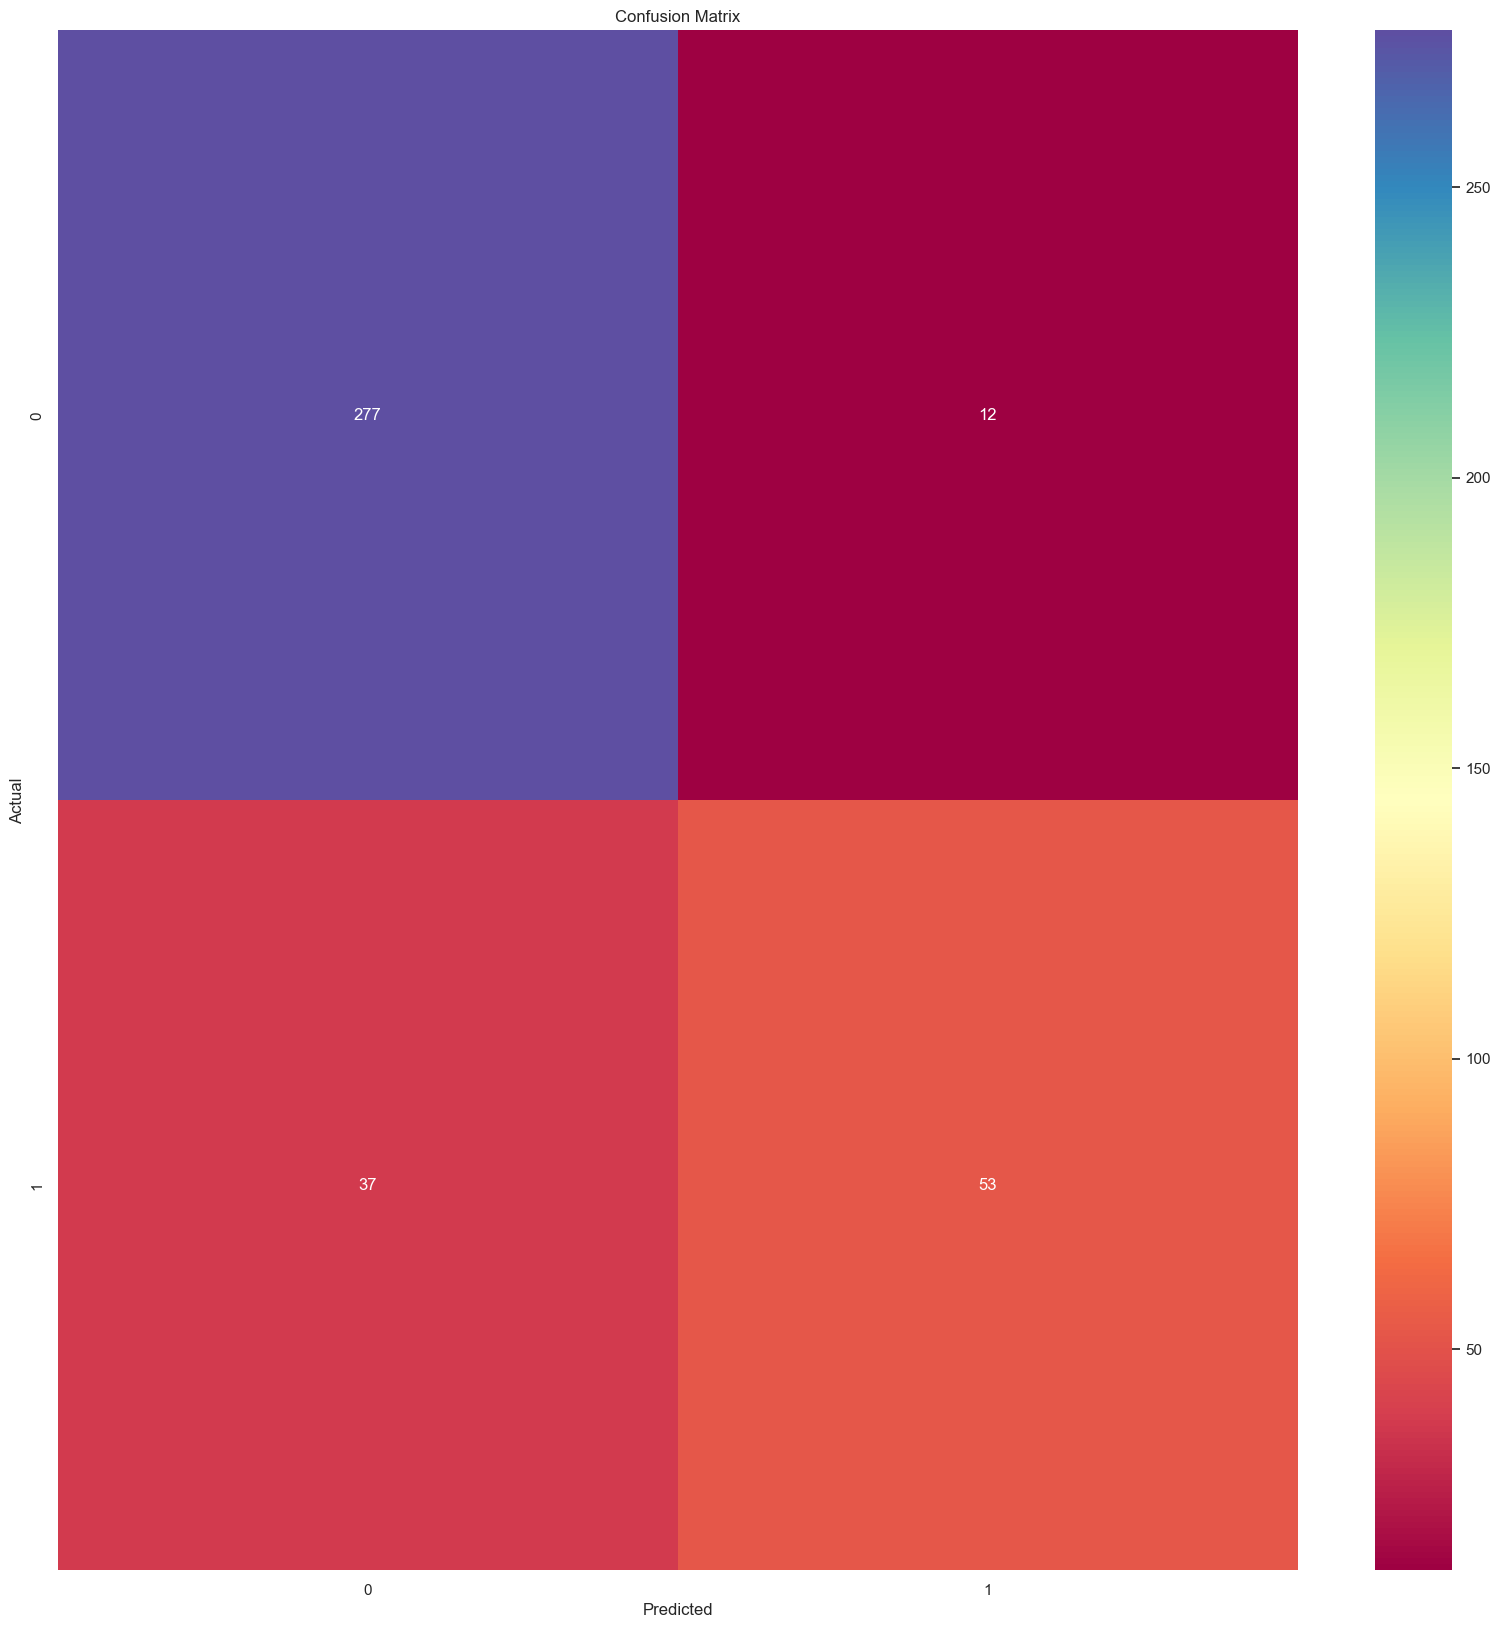

Confidence Interval: [0.9310, 0.9753]


In [93]:
# K-Nearest Neighbors (KNN) # 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Accuracy of KNN Classifier
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

# F1 score of KNN Classifier
f1 = f1_score(y_test, y_pred_knn)
print("F1 Score:", f1)

# Confusion Matrix of KNN Classifier
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, cmap='Spectral',annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Calculate confidence interval of f1 score

 # Calculate observed proportion
def calculate_f1_confidence_interval(true_positives, false_positives, false_negatives, confidence_level=0.95):
    p = true_positives / (true_positives + false_positives)
    
# Calculate z-score for 95% confidence level
    z = 1.96
    
# Calculate sample size
    n = true_positives + false_positives + false_negatives
    
# Calculate lower bound
    lb = (p + (z**2) / (2 * n) - z * math.sqrt((p * (1 - p)) / n + (z**2) / (4 * n**2))) / (1 + (z**2) / n)

# Calculate upper bound
    ub = (p + (z**2) / (2 * n) + z * math.sqrt((p * (1 - p)) / n + (z**2) / (4 * n**2))) / (1 + (z**2) / n)
    
    return lb, ub

# Data from confusion matrix above
true_positives = 277
false_positives = 12
false_negatives = 37

lb, ub = calculate_f1_confidence_interval(true_positives, false_positives, false_negatives)

print(f"Confidence Interval: [{lb:.4f}, {ub:.4f}]")

In [53]:
# AFTER THE FIRST ROUND OF ALGORITHMS, I DECIDED TO PICK ONLY LOGISTIC REGRESSION AND RANDOM FOREST CLASSIFIER
# I will now utilize multiple strategies to improve the F1 score (goal = 0.9+)

# Tune hyperparameters in order to improve F1 score in Logistic Regression #2
# First, define hyperparameters for logistic regression
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0]
}

# Create logistic regression model
model = LogisticRegression()

# Use GridSearchCV to tune hyperparameters
gs = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=5)
gs.fit(X_train, y_train)

# Find the best parameters
best_penalty = gs.best_params_['penalty']
best_C = gs.best_params_['C']
best = LogisticRegression(penalty=best_penalty, C=best_C)

# Train the model
best.fit(X_train, y_train)

# Predict on testing set
y_pred = best.predict(X_test)

# Test model accuracy 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Test F1 score of model
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

/Users/elenakoncar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elenakoncar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elenakoncar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elenakoncar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when 

Accuracy: 0.8786279683377308
F1 Score: 0.7125


In [54]:
# Adjust the number of trees (n_estimators) in order to improve F1 score in Random Forest Classifier #2

# Random Forest Classifier # 2
rfc2 = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to training set
rfc2.fit(X_train, y_train)

# Predict on test data
y_pred_rfc2 = rfc2.predict(X_test)

# Test model accuracy 
accuracy = accuracy_score(y_test, y_pred_rfc2)
print('Accuracy:', accuracy)

# F1 score of Random Forest Classifier
f1 = f1_score(y_test, y_pred_rfc2)
print("F1 Score:", f1)


/var/folders/sj/yc_q_hbs2m9__l141skb8xk40000gn/T/ipykernel_98622/3478042098.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc2.fit(X_train, y_train)


Accuracy: 0.8970976253298153
F1 Score: 0.7547169811320754


In [55]:
# Random Forest Classifier #3

# Random Forest Classifier # 2
rfc3 = RandomForestClassifier(n_estimators=100000, random_state=42)

# Fit the model to training set
rfc3.fit(X_train, y_train)

# Predict on test data
y_pred_rfc3 = rfc3.predict(X_test)

# Test model accuracy 
accuracy = accuracy_score(y_test, y_pred_rfc2)
print('Accuracy:', accuracy)

# F1 score of Random Forest Classifier
f1 = f1_score(y_test, y_pred_rfc2)
print("F1 Score:", f1)

/var/folders/sj/yc_q_hbs2m9__l141skb8xk40000gn/T/ipykernel_98622/3569948650.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc3.fit(X_train, y_train)


Accuracy: 0.8970976253298153
F1 Score: 0.7547169811320754


Accuracy: 0.83
F1 score: 0.8425925925925926


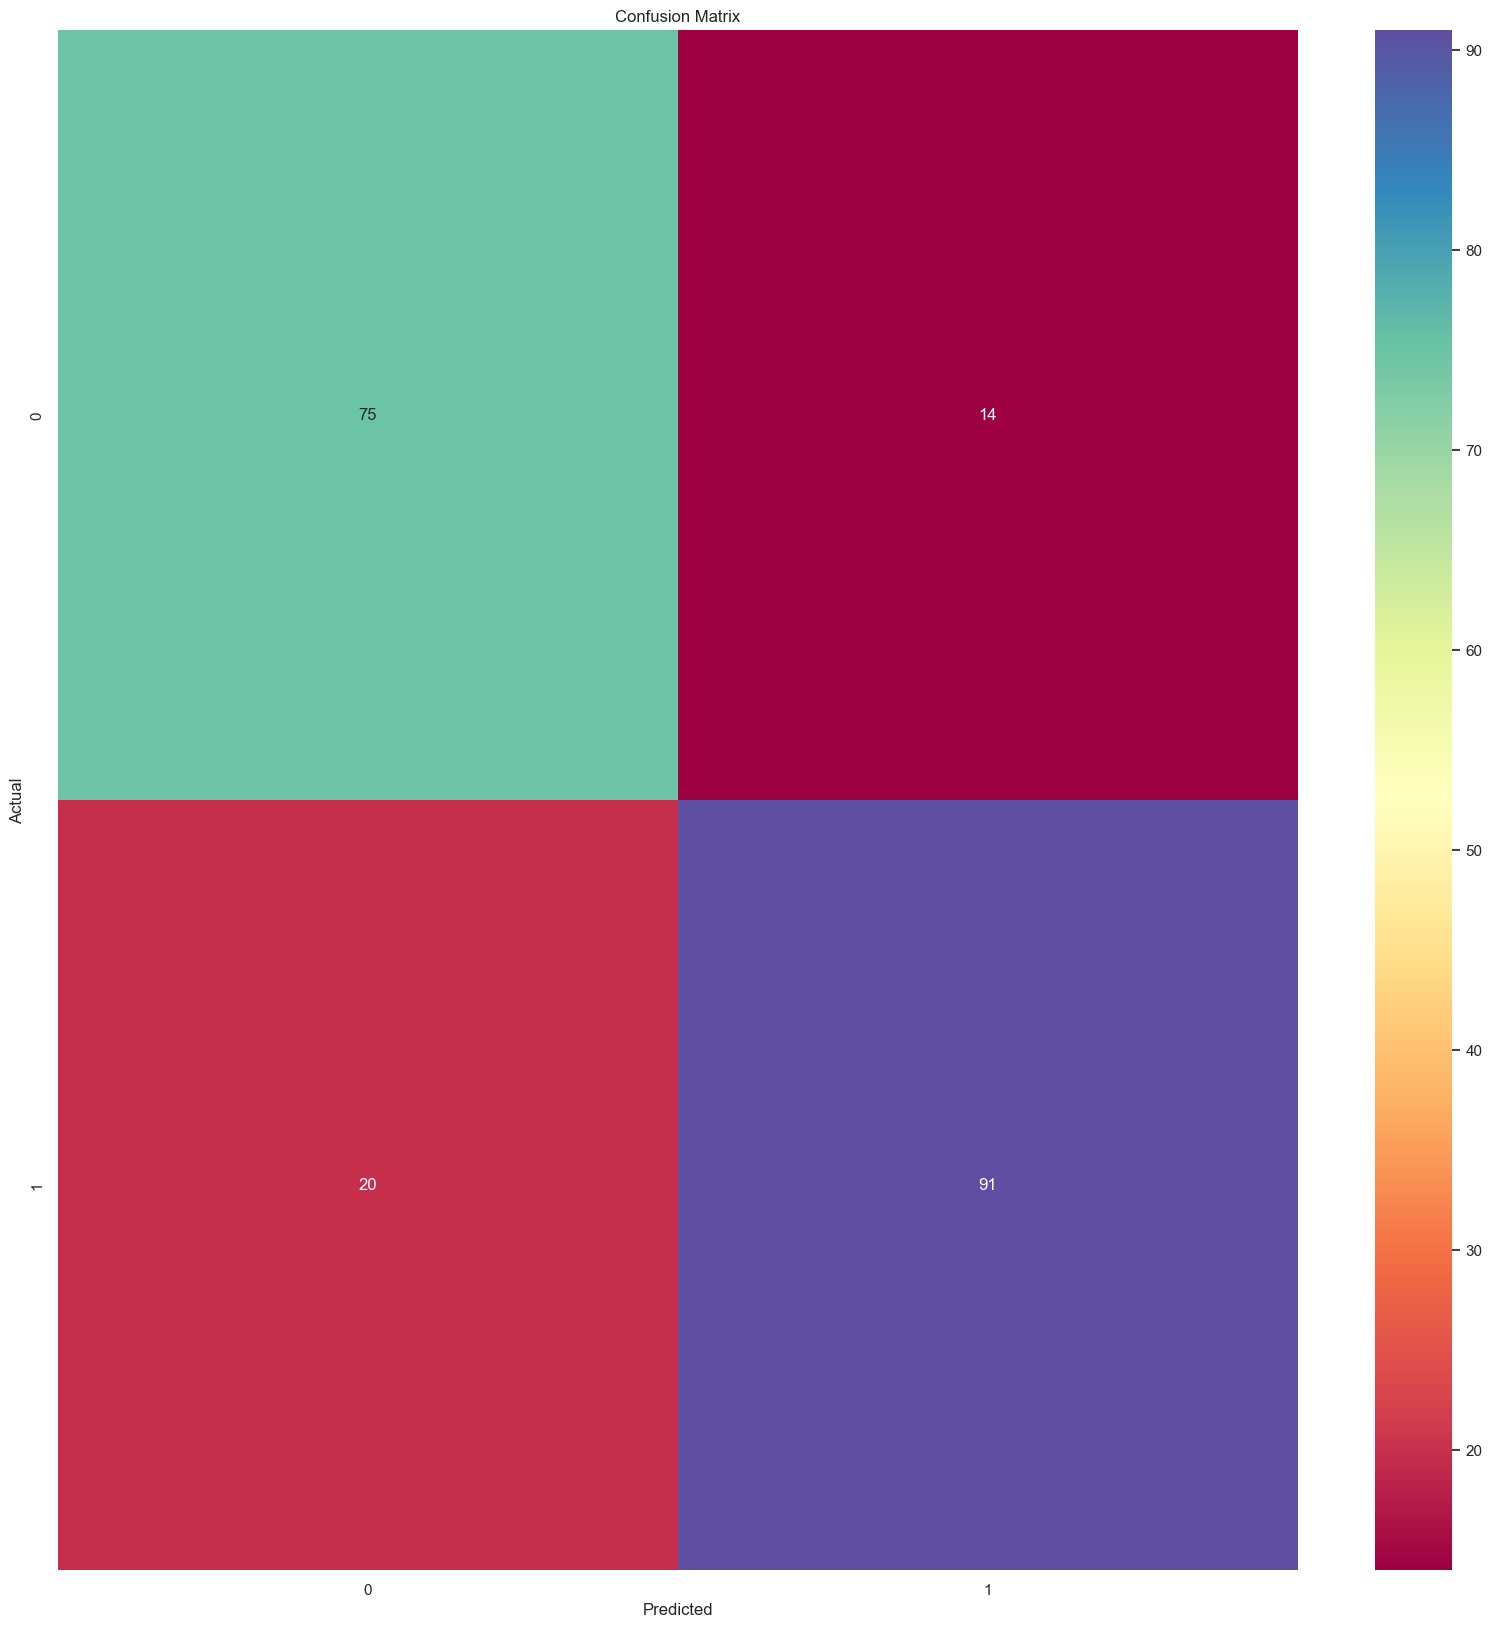

Confidence Interval: [0.7628, 0.8992]


In [94]:
# Logistic Regression #3 with L2 regularization 

# Generate dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model with L2 regularization
lr3 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)

# Train the model
lr3.fit(X_train, y_train)

# Make predictions on the test set
y_pred3 = lr3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred3)
print("F1 score:", f1)

# Confusion Matrix of Logistic Regression #3
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, cmap='Spectral',annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate CI for f1 score of Logistic Regression #3

 # Calculate observed proportion
def calculate_f1_confidence_interval(true_positives, false_positives, false_negatives, confidence_level=0.95):
    p = true_positives / (true_positives + false_positives)
    
# Calculate z-score for 95% confidence level
    z = 1.96
    
# Calculate sample size
    n = true_positives + false_positives + false_negatives
    
# Calculate lower bound
    lb = (p + (z**2) / (2 * n) - z * math.sqrt((p * (1 - p)) / n + (z**2) / (4 * n**2))) / (1 + (z**2) / n)

# Calculate upper bound
    ub = (p + (z**2) / (2 * n) + z * math.sqrt((p * (1 - p)) / n + (z**2) / (4 * n**2))) / (1 + (z**2) / n)
    
    return lb, ub

# Data from confusion matrix above
true_positives = 75
false_positives = 14
false_negatives = 20

lb, ub = calculate_f1_confidence_interval(true_positives, false_positives, false_negatives)

print(f"Confidence Interval: [{lb:.4f}, {ub:.4f}]")